# IMPORT DATASET

In [11]:
from ast import literal_eval
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('data_preprocessing.csv', encoding='utf-8')
df['text'] = df['text'].apply(literal_eval)
df['timestamp'] = pd.to_datetime(df['timestamp'])
pd.set_option('display.max_rows', None)

# ANALISIS SENTIMEN

In [13]:
def gantiBaku(data):
    rep = pd.read_csv('replace.csv', encoding='utf-8')
    temp = []
    for x in data:
        a = rep.loc[rep['text'] == x]
        if len(a['text']) != 0:
            temp.append(a['replace'].iloc[0])
        else:
            temp.append(x)
    return temp

def filterKata(data,input):
    with open(input, 'r') as f: poslist = [line.strip() for line in f]
    hasil = [x for x in data if x in poslist]
    return hasil

def cekSentimen(data):
    hasil = len(data['positif']) - len(data['negatif'])
    if (hasil<0):
        return 'Negatif'
    elif (hasil>0):
        return 'Positif'
    return 'Netral'

df['text'] = df.apply(lambda row: gantiBaku(row['text']), axis=1)
df['positif'] = df.apply(lambda row: filterKata(row['text'],'positif.txt'), axis=1)
df['negatif'] = df.apply(lambda row: filterKata(row['text'],'negatif.txt'), axis=1)
df['sentimen'] = df.apply(lambda row: cekSentimen(row), axis=1)
df

tweet_id      screen_name           timestamp  \
0     1079908816664244224        UMMcampus 2019-01-01 01:15:00   
1     1079954367065669632        UMMcampus 2019-01-01 04:16:00   
2     1079985069035610112        UMMcampus 2019-01-01 06:18:00   
3     1080009658172039168      YuniarDwi_R 2019-01-01 07:55:42   
4     1080111915156725760       lilianawlr 2019-01-01 14:42:02   
5     1080116334527037445  rozikinmshobrie 2019-01-01 14:59:36   
6     1080308294067998721        UMMcampus 2019-01-02 03:42:23   
7     1081358066212171777        UMMcampus 2019-01-05 01:13:48   
8     1081359289426489344        DhonaTito 2019-01-05 01:18:39   
9     1081369453433040896       C_Arifin07 2019-01-05 01:59:03   
10    1081369957336674304           Ndyaku 2019-01-05 02:01:03   
11    1081370118028849152           Ndyaku 2019-01-05 02:01:41   
12    1081385458955735040         bbbbaall 2019-01-05 03:02:39   
13    1081390817271402496       C_Arifin07 2019-01-05 03:23:56   
14    1081417431745064960     drpdiyan1997 2019-01-05 05:09:42   
15    1081454168991162369       biaaabeooo 2019-01-05 07:35:40   
16    1081546115651035144        majalahSM 2019-01-05 13:41:02   
17    1081569178501271554      skin_lovers 2019-01-05 15:12:41   
18    1081572601686704128     Iswara_Bagas 2019-01-05 15:26:17   
19    1081615829249093632    FajarArisanto 2019-01-05 18:18:03   
20    1081647916484194304           Ndyaku 2019-01-05 20:25:33   
21    1081815062904360963        nammanura 2019-01-06 07:29:44   
22    1082104297830006785        UMMcampus 2019-01-07 02:39:03   
23    1082227648057622528        UMMcampus 2019-01-07 10:49:12   
24    1082228128112472071        UMMcampus 2019-01-07 10:51:07   
25    1082238044818657283    nirwana_ellen 2019-01-07 11:30:31   
26    1082260402874937345       C_Arifin07 2019-01-07 12:59:22   
27    1082491427211231233        UMMcampus 2019-01-08 04:17:22   
28    1082521075936718848        UMMcampus 2019-01-08 06:15:11   
29    1082838553761959936        UMMcampus 2019-01-09 03:16:44   
30    1082838646556831746        UMMcampus 2019-01-09 03:17:06   
31    1082838863423229952        UMMcampus 2019-01-09 03:17:57   
32    1082860767798546432        UMMcampus 2019-01-09 04:45:00   
33    1082862026274164737        UMMcampus 2019-01-09 04:50:00   
34    1082868317533069312        UMMcampus 2019-01-09 05:15:00   
35    1082872094218579968        UMMcampus 2019-01-09 05:30:00   
36    1082875120283054081        Frouzzzii 2019-01-09 05:42:02   
37    1082878132317835265        UMMcampus 2019-01-09 05:54:00   
38    1082879893992427521        UMMcampus 2019-01-09 06:01:00   
39    1082883417216372736        UMMcampus 2019-01-09 06:15:00   
40    1082888064135946240     Nicka_Clouds 2019-01-09 06:33:28   
41    1082895496891510784        UMMcampus 2019-01-09 07:03:00   
42    1082908582859952129        UMMcampus 2019-01-09 07:55:00   
43    1082919325789384704    nirwana_ellen 2019-01-09 08:37:41   
44    1082924941903912960        UMMcampus 2019-01-09 09:00:00   
45    1082940816069279744         khathiby 2019-01-09 10:03:05   
46    1082970239199899648        UMMcampus 2019-01-09 12:00:00   
47    1083173830766587904        UMMcampus 2019-01-10 01:29:00   
48    1083195501292318720     ach_rofiqi76 2019-01-10 02:55:06   
49    1083211831819128832        UMMcampus 2019-01-10 04:00:00   
50    1083238507064115202        UMMcampus 2019-01-10 05:46:00   
51    1083245927488352257     muhammadiyah 2019-01-10 06:15:29   
52    1084655584551395330        UMMcampus 2019-01-14 03:36:57   
53    1084664492368191488        UMMcampus 2019-01-14 04:12:21   
54    1084664884258717700          Whymafm 2019-01-14 04:13:55   
55    1084666063936090112        bbpbapjpr 2019-01-14 04:18:36   
56    1084666132815011841        UMMcampus 2019-01-14 04:18:52   
57    1084684786730319873        UMMcampus 2019-01-14 05:33:00   
58    1084687067743805441       inasyahda_ 2019-01-14 05:42:04   
59    1084687850828779521       diyahummah 2019-01-14 05:

# PLOTTING

### Sentiment Keseluruhan

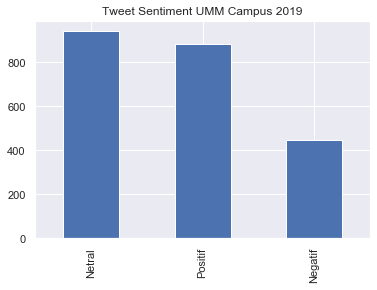

In [14]:
plo = df['sentimen'].value_counts().plot.bar(title='Tweet Sentiment UMM Campus 2019')
# df['sentimen'].value_counts()

### Sentiment Berdasarkan Bulan

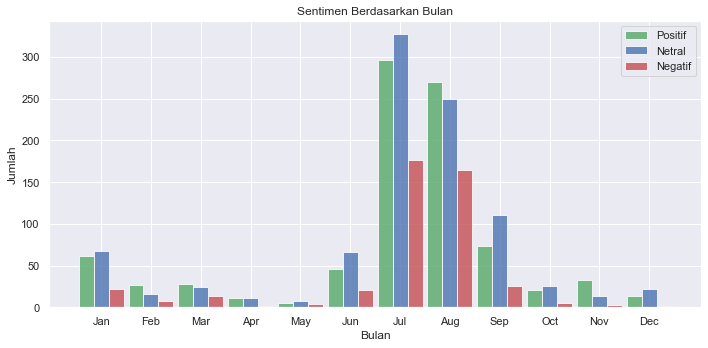

In [15]:
import calendar
import numpy as np
import matplotlib.pyplot as plt
d = {'timestamp':'Month','sentimen':'Sentimen'}
dataBulan = (df.groupby([df['timestamp'].dt.month, 'sentimen'])['sentimen']
       .count()
       .reset_index(name='Count')
       .rename(columns=d))
dataBulan['Month'] = dataBulan['Month'].apply(lambda x: calendar.month_abbr[x])
positif = dataBulan.loc[(dataBulan['Sentimen'] == 'Positif')]
negatif = dataBulan.loc[(dataBulan['Sentimen'] == 'Negatif')]
netral = dataBulan.loc[(dataBulan['Sentimen'] == 'Netral')]

# create plot
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
index = np.arange(12)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, positif['Count'], bar_width,
alpha=opacity,
color='g',
label='Positif')

rects2 = plt.bar(index + bar_width, netral['Count'], bar_width,
alpha=opacity,
color='b',
label='Netral')

rects3 = plt.bar(index + bar_width + bar_width, negatif['Count'], bar_width,
alpha=opacity,
color='r',
label='Negatif')

plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Sentimen Berdasarkan Bulan')
plt.xticks(index + bar_width, positif['Month'])
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
df

tweet_id      screen_name           timestamp  \
0     1079908816664244224        UMMcampus 2019-01-01 01:15:00   
1     1079954367065669632        UMMcampus 2019-01-01 04:16:00   
2     1079985069035610112        UMMcampus 2019-01-01 06:18:00   
3     1080009658172039168      YuniarDwi_R 2019-01-01 07:55:42   
4     1080111915156725760       lilianawlr 2019-01-01 14:42:02   
5     1080116334527037445  rozikinmshobrie 2019-01-01 14:59:36   
6     1080308294067998721        UMMcampus 2019-01-02 03:42:23   
7     1081358066212171777        UMMcampus 2019-01-05 01:13:48   
8     1081359289426489344        DhonaTito 2019-01-05 01:18:39   
9     1081369453433040896       C_Arifin07 2019-01-05 01:59:03   
10    1081369957336674304           Ndyaku 2019-01-05 02:01:03   
11    1081370118028849152           Ndyaku 2019-01-05 02:01:41   
12    1081385458955735040         bbbbaall 2019-01-05 03:02:39   
13    1081390817271402496       C_Arifin07 2019-01-05 03:23:56   
14    1081417431745064960     drpdiyan1997 2019-01-05 05:09:42   
15    1081454168991162369       biaaabeooo 2019-01-05 07:35:40   
16    1081546115651035144        majalahSM 2019-01-05 13:41:02   
17    1081569178501271554      skin_lovers 2019-01-05 15:12:41   
18    1081572601686704128     Iswara_Bagas 2019-01-05 15:26:17   
19    1081615829249093632    FajarArisanto 2019-01-05 18:18:03   
20    1081647916484194304           Ndyaku 2019-01-05 20:25:33   
21    1081815062904360963        nammanura 2019-01-06 07:29:44   
22    1082104297830006785        UMMcampus 2019-01-07 02:39:03   
23    1082227648057622528        UMMcampus 2019-01-07 10:49:12   
24    1082228128112472071        UMMcampus 2019-01-07 10:51:07   
25    1082238044818657283    nirwana_ellen 2019-01-07 11:30:31   
26    1082260402874937345       C_Arifin07 2019-01-07 12:59:22   
27    1082491427211231233        UMMcampus 2019-01-08 04:17:22   
28    1082521075936718848        UMMcampus 2019-01-08 06:15:11   
29    1082838553761959936        UMMcampus 2019-01-09 03:16:44   
30    1082838646556831746        UMMcampus 2019-01-09 03:17:06   
31    1082838863423229952        UMMcampus 2019-01-09 03:17:57   
32    1082860767798546432        UMMcampus 2019-01-09 04:45:00   
33    1082862026274164737        UMMcampus 2019-01-09 04:50:00   
34    1082868317533069312        UMMcampus 2019-01-09 05:15:00   
35    1082872094218579968        UMMcampus 2019-01-09 05:30:00   
36    1082875120283054081        Frouzzzii 2019-01-09 05:42:02   
37    1082878132317835265        UMMcampus 2019-01-09 05:54:00   
38    1082879893992427521        UMMcampus 2019-01-09 06:01:00   
39    1082883417216372736        UMMcampus 2019-01-09 06:15:00   
40    1082888064135946240     Nicka_Clouds 2019-01-09 06:33:28   
41    1082895496891510784        UMMcampus 2019-01-09 07:03:00   
42    1082908582859952129        UMMcampus 2019-01-09 07:55:00   
43    1082919325789384704    nirwana_ellen 2019-01-09 08:37:41   
44    1082924941903912960        UMMcampus 2019-01-09 09:00:00   
45    1082940816069279744         khathiby 2019-01-09 10:03:05   
46    1082970239199899648        UMMcampus 2019-01-09 12:00:00   
47    1083173830766587904        UMMcampus 2019-01-10 01:29:00   
48    1083195501292318720     ach_rofiqi76 2019-01-10 02:55:06   
49    1083211831819128832        UMMcampus 2019-01-10 04:00:00   
50    1083238507064115202        UMMcampus 2019-01-10 05:46:00   
51    1083245927488352257     muhammadiyah 2019-01-10 06:15:29   
52    1084655584551395330        UMMcampus 2019-01-14 03:36:57   
53    1084664492368191488        UMMcampus 2019-01-14 04:12:21   
54    1084664884258717700          Whymafm 2019-01-14 04:13:55   
55    1084666063936090112        bbpbapjpr 2019-01-14 04:18:36   
56    1084666132815011841        UMMcampus 2019-01-14 04:18:52   
57    1084684786730319873        UMMcampus 2019-01-14 05:33:00   
58    1084687067743805441       inasyahda_ 2019-01-14 05:42:04   
59    1084687850828779521       diyahummah 2019-01-14 05:

In [24]:
data_mapped = df.copy()
data_mapped['sentimen']=data_mapped['sentimen'].map({'Netral':0,'Positif':1,'Negatif':2})
data_mapped.head()

tweet_id  screen_name           timestamp  \
0  1079908816664244224    UMMcampus 2019-01-01 01:15:00   
1  1079954367065669632    UMMcampus 2019-01-01 04:16:00   
2  1079985069035610112    UMMcampus 2019-01-01 06:18:00   
3  1080009658172039168  YuniarDwi_R 2019-01-01 07:55:42   
4  1080111915156725760   lilianawlr 2019-01-01 14:42:02   

                                                text  likes  retweets  \
0  [strengthening, interfaith, tolerance, kaca, v...      3         0   
1  [strengthen, branding, gresik, typical, food, ...      4         4   
2  [year, batu, mayor, sociology, holds, dialogue...      0         0   
3                                    [panggil, arap]      0         0   
4                                          [hiyaaaa]      0         0   

   replies                     positif negatif  sentimen  
0        0  [strengthening, tolerance]      []         1  
1        0                [strengthen]      []         1  
2        0                          []      []         0  
3        0                          []      []         0  
4        0                          []      []         0

In [115]:
z = data_mapped.drop(['tweet_id','likes','retweets','replies','sentimen'], axis=1) 
z.head()

screen_name           timestamp  \
0    UMMcampus 2019-01-01 01:15:00   
1    UMMcampus 2019-01-01 04:16:00   
2    UMMcampus 2019-01-01 06:18:00   
3  YuniarDwi_R 2019-01-01 07:55:42   
4   lilianawlr 2019-01-01 14:42:02   

                                                text  \
0  [strengthening, interfaith, tolerance, kaca, v...   
1  [strengthen, branding, gresik, typical, food, ...   
2  [year, batu, mayor, sociology, holds, dialogue...   
3                                    [panggil, arap]   
4                                          [hiyaaaa]   

                      positif negatif  
0  [strengthening, tolerance]      []  
1                [strengthen]      []  
2                          []      []  
3                          []      []  
4                          []      []

In [250]:
x = data_mapped[['tweet_id','likes','retweets','replies','sentimen']]
x.head()

tweet_id  likes  retweets  replies  sentimen
0  1079908816664244224      3         0        0         1
1  1079954367065669632      4         4        0         1
2  1079985069035610112      0         0        0         0
3  1080009658172039168      0         0        0         0
4  1080111915156725760      0         0        0         0

In [251]:
x_alter = x.drop(['sentimen'], axis = 1)
x_alter

tweet_id  likes  retweets  replies
0     1079908816664244224      3         0        0
1     1079954367065669632      4         4        0
2     1079985069035610112      0         0        0
3     1080009658172039168      0         0        0
4     1080111915156725760      0         0        0
5     1080116334527037445      0         0        0
6     1080308294067998721     13         3        1
7     1081358066212171777     12         5        7
8     1081359289426489344      0         0        0
9     1081369453433040896      5         2        1
10    1081369957336674304      0         0        0
11    1081370118028849152      0         0        1
12    1081385458955735040      0         0        0
13    1081390817271402496      0         0        0
14    1081417431745064960      0         0        0
15    1081454168991162369      0         0        0
16    1081546115651035144      3         1        0
17    1081569178501271554      1         0        1
18    1081572601686704128      0         0        0
19    1081615829249093632      0         0        0
20    1081647916484194304      0         0        0
21    1081815062904360963      0         0        0
22    1082104297830006785      0         0        0
23    1082227648057622528     15        13        3
24    1082228128112472071      3         2        2
25    1082238044818657283      0         0        1
26    1082260402874937345      0         0        1
27    1082491427211231233      2         2        0
28    1082521075936718848      2         0        0
29    1082838553761959936      1         0        0
30    1082838646556831746      0         0        1
31    1082838863423229952      0         0        1
32    1082860767798546432     18         4        1
33    1082862026274164737      0         0        0
34    1082868317533069312      9         1        0
35    1082872094218579968      1         0        0
36    1082875120283054081      0         0        0
37    1082878132317835265      2         0        0
38    1082879893992427521      0         0        0
39    1082883417216372736      3         0        0
40    1082888064135946240      2         0        0
41    1082895496891510784      4         0        0
42    1082908582859952129      1         1        0
43    1082919325789384704      0         0        0
44    1082924941903912960      6         1        0
45    1082940816069279744      0         0        0
46    1082970239199899648      4         2        0
47    1083173830766587904      2         0        0
48    1083195501292318720      0         0        0
49    1083211831819128832      7         1        0
50    1083238507064115202      3         1        0
51    1083245927488352257      9         1        0
52    1084655584551395330     11         2       16
53    1084664492368191488      5         4        0
54    1084664884258717700      1         1        0
55    1084666063936090112     11         6        2
56    1084666132815011841      2         0        0
57    1084684786730319873      7         1        0
58    1084687067743805441      1         2        0
59    1084687850828779521      0         1        0
60    1084701757077221376      0         0        0
61    1084724980024147969      1         0        0
62    1084738234536448000      1         1        2
63    1084760742883057664      0         1        0
64    1086089067480047616      3         1        0
65    1086126663207870464      2         2        0
66    1086140126546325504      9         3        0
67    1086175849240379392      6         9        0
68    1086207793818816512      1         1        0
69    1086209105239261184      0         1        0
70    1086215142348451840      0         1        1
71    1086217227395784706      0         1        0
72    1086219361059168256      3         1        0
73    1086275598522040321      1         1        0
74    1086290914639630336      0         0        0
75    1086309901675065344      3         1        0
76    1086434

In [288]:
y_gain = x['sentimen']
y_gain.head()

0    1
1    1
2    0
3    0
4    0
Name: sentimen, dtype: int64

In [253]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [733]:
x_alter_train4, x_alter_test4, y_gain_train4, y_gain_test4 = train_test_split(x_alter, y_gain, test_size=0.4, random_state=10)

In [734]:
knn=KNeighborsClassifier(n_neighbors=3)

In [735]:
x_train4.shape

(1364, 5)

In [736]:
x_test4.shape

(910, 5)

In [737]:
y_gain_train4.shape

(1364,)

In [738]:
y_gain_test4.shape

(910,)

In [739]:
knn.fit(x_train4,y_gain_train4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [740]:
knn.score(x_test4,y_gain_test4)

0.3802197802197802

In [741]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [742]:
model = RandomForestClassifier(n_estimators =3, random_state=10)

In [743]:
x_alter_train3, x_alter_test3, y_gain_train3, y_gain_test3 = train_test_split(x, y_gain, test_size=0.4, random_state=10)

In [744]:
model.fit(x_train3, y_gain_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [745]:
prediction_test = model.predict(x_test3)

In [747]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_gain_test3, prediction_test))

Accuracy =  0.987912087912088
